In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from matplotlib.pyplot import figure, show, rc
import matplotlib

In [2]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
# 删除相互之间相关性较强的自变量（去掉其中平均绝对相关系数较大的那一个）
df_1 = df.drop(['Class'],axis = 1)
corr_df = df_1.corr()  # 相关系数矩阵
colnames = df_1.columns
colnames3 = list()  # 用于存储要剔除的变量名
thred_corr = 0.5  # 相关系数阈值，即两个自变量相关系数大于0.5就只保留一个
for j in range(corr_df.shape[1] - 1):  # 删除相关系数大于0.5的变量
    for i in range(j + 1, corr_df.shape[0] - 1):
        if abs(corr_df.iloc[i, j]) >= thred_corr:
            if np.mean(corr_df.iloc[i, :]) < np.mean(corr_df.iloc[:, j]):  # 去掉其中平均绝对相关系数较大的那一个
                colnames3.append(colnames[j])
            else:
                colnames3.append(colnames[i])
            break
names = df.columns
colnames4 = names.drop(list(set(colnames3)))
#type(colnames4)
#colnames4 = colnames4.append(df.columns[16])

df_2 = df[colnames4]
df_2.head()

,MajorAxisLength,AspectRation,Extent,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
0,208.178117,1.197191,0.763923,0.007332,0.003147,0.998724,SEKER
1,200.524796,1.097356,0.783968,0.006979,0.003564,0.998430,SEKER
2,212.826130,1.209713,0.778113,0.007244,0.003048,0.999066,SEKER
3,210.557999,1.153638,0.782681,0.007017,0.003215,0.994199,SEKER
4,201.847882,1.060798,0.773098,0.006697,0.003665,0.999166,SEKER


In [4]:
df_2.corr()

,MajorAxisLength,AspectRation,Extent,ShapeFactor1,ShapeFactor2,ShapeFactor4
MajorAxisLength,1.000000,0.550335,-0.078062,-0.773609,-0.859238,-0.482527
AspectRation,0.550335,1.000000,-0.370184,0.024593,-0.837841,-0.449264
Extent,-0.078062,-0.370184,1.000000,-0.141616,0.237956,0.148502
ShapeFactor1,-0.773609,0.024593,-0.141616,1.000000,0.469197,0.248619
ShapeFactor2,-0.859238,-0.837841,0.237956,0.469197,1.000000,0.529932
ShapeFactor4,-0.482527,-0.449264,0.148502,0.248619,0.529932,1.000000


G:\anaconda3\lib\site-packages\plotnine\layer.py:333: PlotnineWarning: stat_boxplot : Removed 451 rows containing non-finite values.


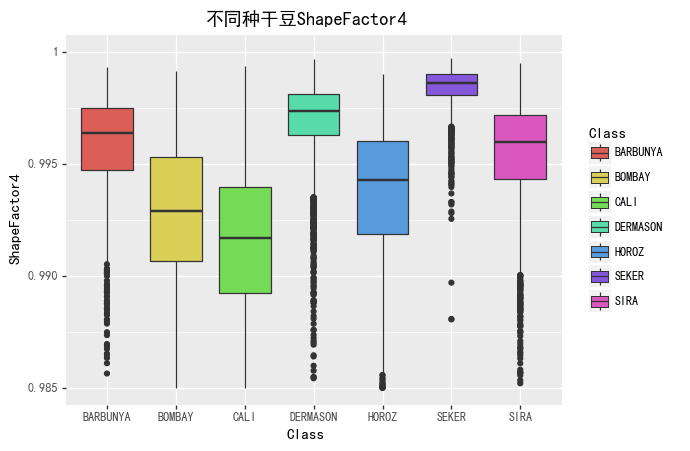

<ggplot: (179402730189)>

In [5]:
(
    ggplot(df_2)
    + geom_boxplot(aes(x='Class', y='ShapeFactor4',fill = 'Class'))
    + labs(x='Class', y='ShapeFactor4',title = '不同种干豆ShapeFactor4')
    + theme(text=element_text(family="SimHei"))
    #+ scale_fill_discrete(name = '盈利情况',breaks = [0,1],labels = ['盈利', '亏损'])
    + ylim(0.985,1)
    #+ theme(legend_title = '盈亏情况')
)

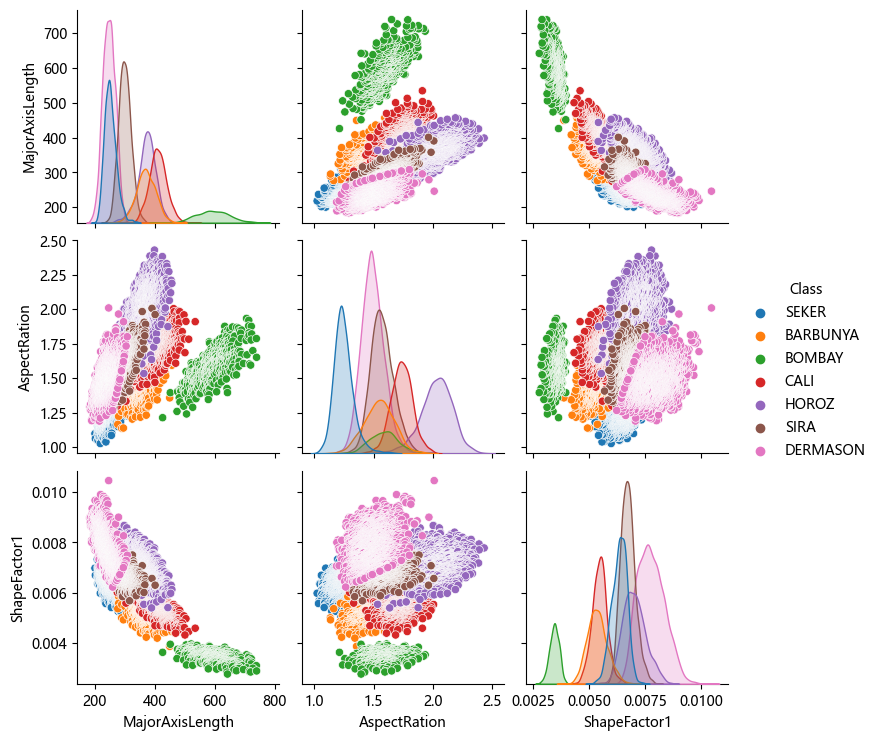

In [6]:
sns.pairplot(data=df_2,hue='Class',
             vars=['MajorAxisLength','AspectRation','ShapeFactor1'])
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [57]:
X = df_2[['MajorAxisLength','AspectRation','Extent','ShapeFactor1','ShapeFactor2','ShapeFactor4']]
#X=df_1
y = df_2['Class']

xmin   = X.min(axis=0)
xmax   = X.max(axis=0)
X_norm = (X-xmin)/(xmax-xmin)


clf = LogisticRegression(random_state=0,multi_class='multinomial',solver='sag')            

clf_model=clf.fit(X_norm,y)

In [58]:
pred_y      = clf_model.predict(X_norm)
count = 0
for i in range(0,len(pred_y)):
    if(pred_y[i] == y[i]):
        count = count+1
        
print(count/len(y))

0.8986114172360591


G:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


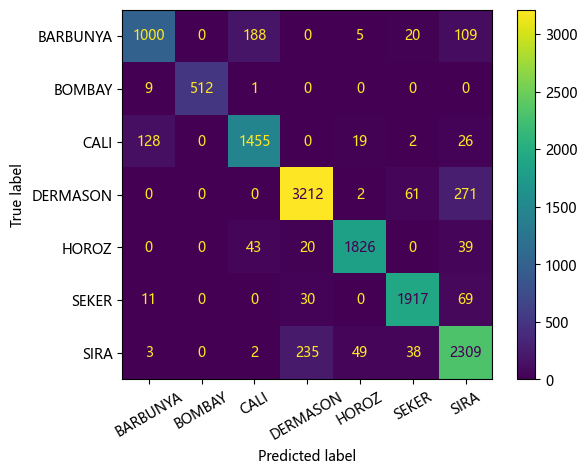

In [10]:
metrics.plot_confusion_matrix(clf_model,X_norm,y)
plt.xticks(rotation=30)
plt.show()

In [11]:
clf = LogisticRegression(random_state=0,multi_class='multinomial',
                         #class_weight={'DERMASON':0.55,'SIRA':0.74,'SEKER':0.96,'HOROZ':1,'CALI':1.19,'BARBUNYA':1.47,'BOMBAY':3.72}
                         #class_weight={'DERMASON':1,'SIRA':1,'SEKER':1,'HOROZ':1,'CALI':1,'BARBUNYA':1,'BOMBAY':1}
                         #class_weight={'DERMASON':4,'SIRA':5,'SEKER':6,'HOROZ':7,'CALI':8,'BARBUNYA':10,'BOMBAY':20}
                         class_weight = 'balanced'
                         ,solver='sag', penalty='l2', C = 1.0)            

clf_model=clf.fit(X_norm,y)

In [12]:
pred_y      = clf.predict(X_norm)
count = 0
for i in range(0,len(pred_y)):
    if(pred_y[i] == y[i]):
        count = count+1
        
print(count/len(y))

0.8931011681728014


G:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


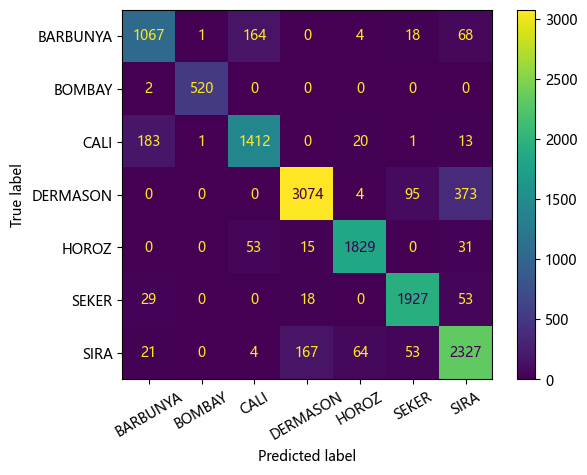

In [13]:
metrics.plot_confusion_matrix(clf_model,X_norm,y)
plt.xticks(rotation=30)
plt.show()

In [14]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [17]:
#生成训练集和测试集
#mapping_1 = {'DERMASON': 1,'SIRA': 2,'SEKER': 3,'HOROZ':4,'CALI':5,'BARBUNYA':6,'BOMBAY':7}
#df['Class2'] = df['Class'].map(mapping_1)
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [18]:
forest = RandomForestClassifier(n_estimators=100,
                               #max_depth = 10,
                                
                               random_state=40)
clf_model2 = forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)


In [19]:
count = 0
for i in range(0,len(y_test_pred)):
    if(y_test_pred[i] == y_test[i]):
        count = count+1
        
print(count/len(y_test_pred))

0.9320602276900477


G:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


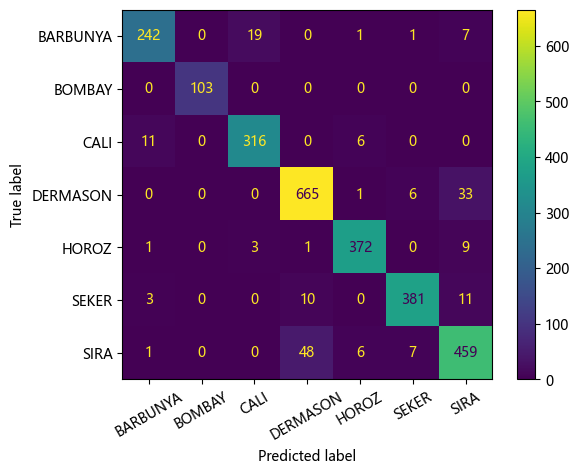

In [20]:
metrics.plot_confusion_matrix(clf_model2,X_test,y_test)
plt.xticks(rotation=30)
plt.show()

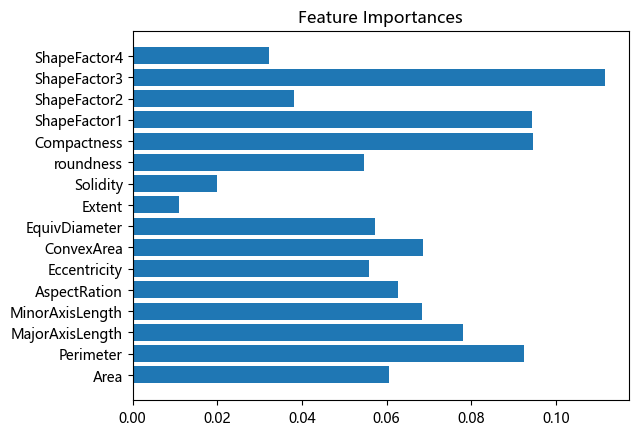

In [21]:
importances = clf_model2.feature_importances_ 
colnames = df_1.columns
colnames.tolist()
plt.barh(range(len(importances)), importances)
plt.title("Feature Importances")
feature_names = colnames.tolist()
plt.yticks(range(len(importances)), feature_names)
plt.show()

In [23]:
class  InputOutOfRange(Exception): pass

In [65]:
#建立dry_bean类
#dry_bean类初始值有两个，分别为自己的特征dataframe,feature_frame和数据即data_frame
class dry_bean:
    def __init__(self,feature_frame,data_frame):
        try:
            X = data_frame[['MajorAxisLength','AspectRation','Extent','ShapeFactor1','ShapeFactor2','ShapeFactor4']]
            xmin   = X.min(axis=0)
            xmax   = X.max(axis=0)
            X_norm = (X-xmin)/(xmax-xmin)
            if((feature_frame>xmax).any(axis = 1).any() == True):
                raise InputOutOfRange('输入值不符合要求')
            if((feature_frame<xmin).any(axis = 1).any() == True):
                 raise InputOutOfRange('输入值不符合要求')
            self.feature_frame = feature_frame
            self.data_frame = data_frame
        except InputOutOfRange :
            raise
    def Logistic(self):
        X = self.data_frame[['MajorAxisLength','AspectRation','Extent','ShapeFactor1','ShapeFactor2','ShapeFactor4']]
        xmin   = X.min(axis=0)
        xmax   = X.max(axis=0)
        X_norm = (X-xmin)/(xmax-xmin)
        y = self.data_frame['Class']
        clf = LogisticRegression(random_state=0,multi_class='multinomial',
                         class_weight = 'balanced'
                         ,solver='sag', penalty='l2', C = 1.0)            
        clf_model=clf.fit(X_norm,y)
        feature_frame_norm = (self.feature_frame-xmin)/(xmax-xmin)
        return clf_model.predict(feature_frame_norm)[0]

In [68]:
feature_frame = pd.DataFrame({'MajorAxisLength':[208.17],
                              'AspectRation':[1.20],
                              'Extent':[0.76],
                              'ShapeFactor1':[0.0073],
                              'ShapeFactor2':[0.0031],
                              'ShapeFactor4':[0.998]})
#if((feature_frame>xmin).any()==False{print(1)}
Bean = dry_bean(feature_frame,df)
print('这个干豆的类别为%s'%Bean.Logistic())

这个干豆的类别为SEKER
